## 4.3 Primer: genomski podatki v obliki nizov znakov

## 4.3 Example: genomic data in the form of character strings

In [1]:
import json
sequences = json.load(open("podatki/seqs.json"))

##### Odgovor 4-3-1

##### Answer 4-3-1

In [2]:
from itertools import product
import numpy as np
import scipy.cluster.hierarchy as sch
%matplotlib inline
%config InlineBackend.figure_formats = ['jpg']
import matplotlib
matplotlib.figure.Figure.__repr__ = lambda self: (
    f"<{self.__class__.__name__} size {self.bbox.size[0]:g}"
    f"x{self.bbox.size[1]:g} with {len(self.axes)} Axes>")

import matplotlib.pyplot as plt

def seq_to_kmer_count(seq, k=4):
    ktuples = list(zip(*[seq[i:] for i in range(k)]))     # razbijemo niz na k-terke
    kmers   = list(product(*(k*[["A", "C", "T", "G"]])))  # vse mozne k-terke
    
    x = np.zeros((len(kmers), ))
    
    for ki, kmer in enumerate(kmers):
        x[ki] = ktuples.count(kmer)
    return x

[[ 182.  157.  110. ...,   22.   18.   15.]
 [ 187.  149.  120. ...,   14.   13.   12.]
 [ 174.  159.  124. ...,   18.   13.   14.]
 ..., 
 [ 158.  125.  120. ...,   22.   31.   27.]
 [ 238.  160.  158. ...,   12.   18.   14.]
 [ 184.  156.  110. ...,   25.   18.   19.]]
(14, 256)


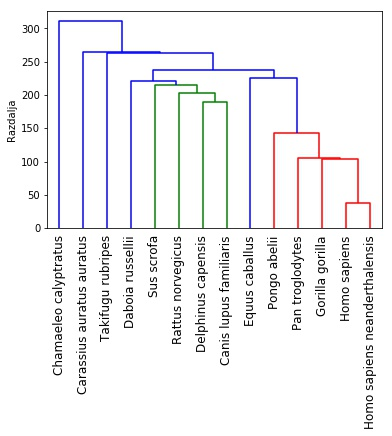

In [3]:
# ...k = 4
k = 4
keys = sequences.keys()
X    = np.zeros((len(keys), 4**k))
for ki, ky in enumerate(keys):
    seq    = sequences[ky]
    X[ki]  = seq_to_kmer_count(seq, k=k)

print(X)
print(X.shape)
H = sch.linkage(X)
D = sch.dendrogram(H, labels=list(sequences.keys()), leaf_rotation=90)
plt.ylabel("Razdalja")
plt.show()